## Twitter Sentiment Analysis

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Data

/content/drive/My Drive/Data


In [ ]:
data=pd.read_csv('twitter.csv')
df

,ID,label,Tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df.drop_duplicates()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
data.columns=['ID','label','tweet']

In [ ]:
data.describe()

,ID,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tweets_df=data

In [ ]:
data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

Get Length

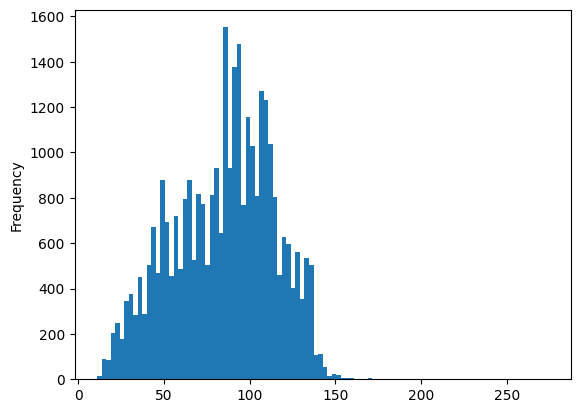

In [ ]:
tweets_df['length']=tweets_df['tweet'].apply(len)

tweets_df['length'].plot(bins=100, kind='hist')
plt.show()

In [ ]:
tweets_df.describe()

,ID,label,length
count,31962.000000,31962.000000,31962.000000
mean,15981.500000,0.070146,84.739628
std,9226.778988,0.255397,29.455749
min,1.000000,0.000000,11.000000
25%,7991.250000,0.000000,63.000000
50%,15981.500000,0.000000,88.000000
75%,23971.750000,0.000000,108.000000
max,31962.000000,1.000000,274.000000


# Define the sentiments

In [ ]:
positive = tweets_df[tweets_df['label']==0]
positive

,ID,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,61
31957,31958,0,ate @user isz that youuu?ðððððð...,68
31958,31959,0,to see nina turner on the airwaves trying to...,131
31959,31960,0,listening to sad songs on a monday morning otw...,63


In [ ]:
negative = tweets_df[tweets_df['label']==1]
negative

,ID,label,tweet,length
13,14,1,@user #cnn calls #michigan middle school 'buil...,74
14,15,1,no comment! in #australia #opkillingbay #se...,101
17,18,1,retweet if you agree!,22
23,24,1,@user @user lumpy says i am a . prove it lumpy.,47
34,35,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,31948,1,@user @user you don't have the balls to hashta...,112
31948,31949,1,"makes you ask yourself, who am i? then am i a...",87


# Cleaning

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    filtered_tokens = [token for token in tokens if token not in stop_words and token!= 'user']
    return ' '.join(filtered_tokens)



# Apply preprocessing to the 'Tweet content' column
data['tweet']=data['tweet'].astype('str')
data['clean_text'] = data['tweet'].apply(preprocess_text)

# WorldCloud

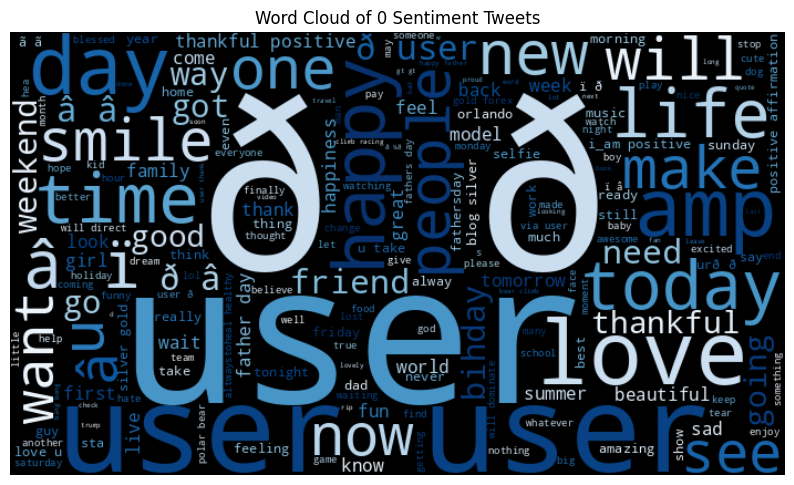

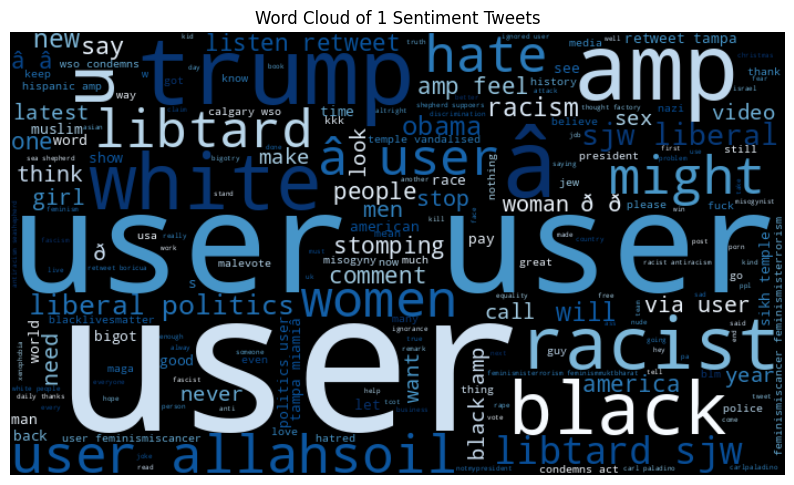

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(sentiment):
    # Filter tweets of the specified sentiment and extract the 'Tweet content' column
    tweets = data[data["label"] == sentiment]["tweet"]

    # Convert the tweets to strings
    tweets = tweets.astype(str)

    # Join all the tweets into a single string
    text = ' '.join(tweets)

    # Create a WordCloud object
    wordcloud = WordCloud(
        width=700, height=400,
        colormap='Blues').generate(text)


    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {sentiment} Sentiment Tweets')
    plt.show()


# Iterate over the unique sentiments in the DataFrame
sentiments = data['label'].unique()
for sentiment in sentiments:
    generate_wordcloud(sentiment)


# Train Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data['clean_text'], data['label'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Train a Support Vector Machine (SVM) classifier
svm = SVC(kernel='linear')
svm.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred = svm.predict(X_val_vec)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:')
print(report)

Accuracy: 0.9591740966682308
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.87      0.50      0.64       456

    accuracy                           0.96      6393
   macro avg       0.92      0.75      0.81      6393
weighted avg       0.96      0.96      0.95      6393



In [ ]:
data['clean_text'] = data['tweet'].apply(preprocess_text)

# Vectorize the text data
X_val_data = vectorizer.transform(data['clean_text'])

# Make predictions on the validation data
y_val_pred = svm.predict(X_val_data)

# save the predicted sentiments
predictions_df = pd.DataFrame({'Predicted Sentiment': y_val_pred})
predictions_df.to_csv('predicted_sentiments.csv', index=False)

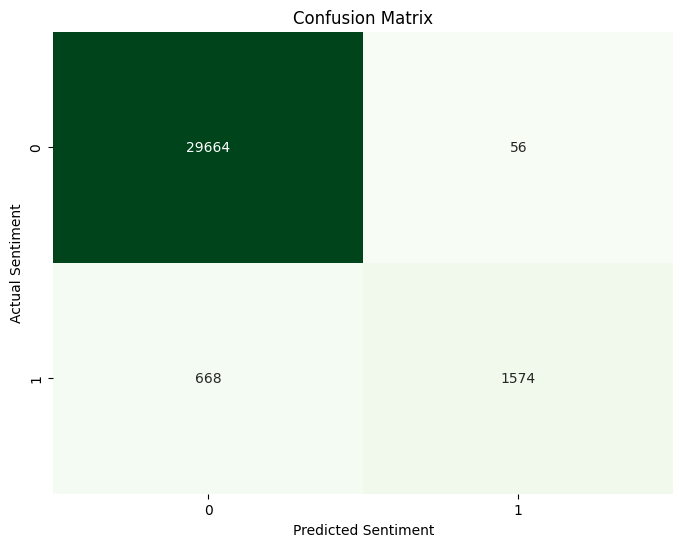

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     29720
           1       0.97      0.70      0.81      2242

    accuracy                           0.98     31962
   macro avg       0.97      0.85      0.90     31962
weighted avg       0.98      0.98      0.98     31962



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the LabelEncoder object
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the sentiment labels in the training data
label_encoder.fit(data['label'])
from sklearn.metrics import confusion_matrix, classification_report

actual_sentiments=data['label']
predicted_sentiments=y_val_pred
# Create a confusion matrix
confusion = confusion_matrix(actual_sentiments, predicted_sentiments)

# Create a classification report
classification = classification_report(actual_sentiments, predicted_sentiments)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", classification)